# Problem statement:
Principal component Analysis

# Q1. Import libraries and Load the Data file into Python DataFrame and view top 10 rows

In [45]:
#Import all the necessary modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv("bc2.csv")
data_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [4]:
data_df.shape

(699, 11)

In [5]:
data_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
# Bare nuclei is taken as object typeeven thoughit has numerical values.
data_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [7]:
data_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
data_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
data_df[data_df['Bare Nuclei']=="?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [10]:
data_df[data_df['Bare Nuclei']=="?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
data_df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [12]:
# We would impute by using mode (we can also look for advane imputation such as knn imputation in fancyimpute package)
data_df['Bare Nuclei'].replace("?",'1', inplace=True)
data_df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [13]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype('int64')

In [14]:
# Check for duplicate data

dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()


Number of duplicate rows = 9


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [15]:
# Remove duplicate rows

print('Number of rows before discarding duplicates = %d' % (data_df.shape[0]))
data_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (data_df.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 690


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences.

In [16]:
# Check for correlation of variable
data_df.corr(method='pearson')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


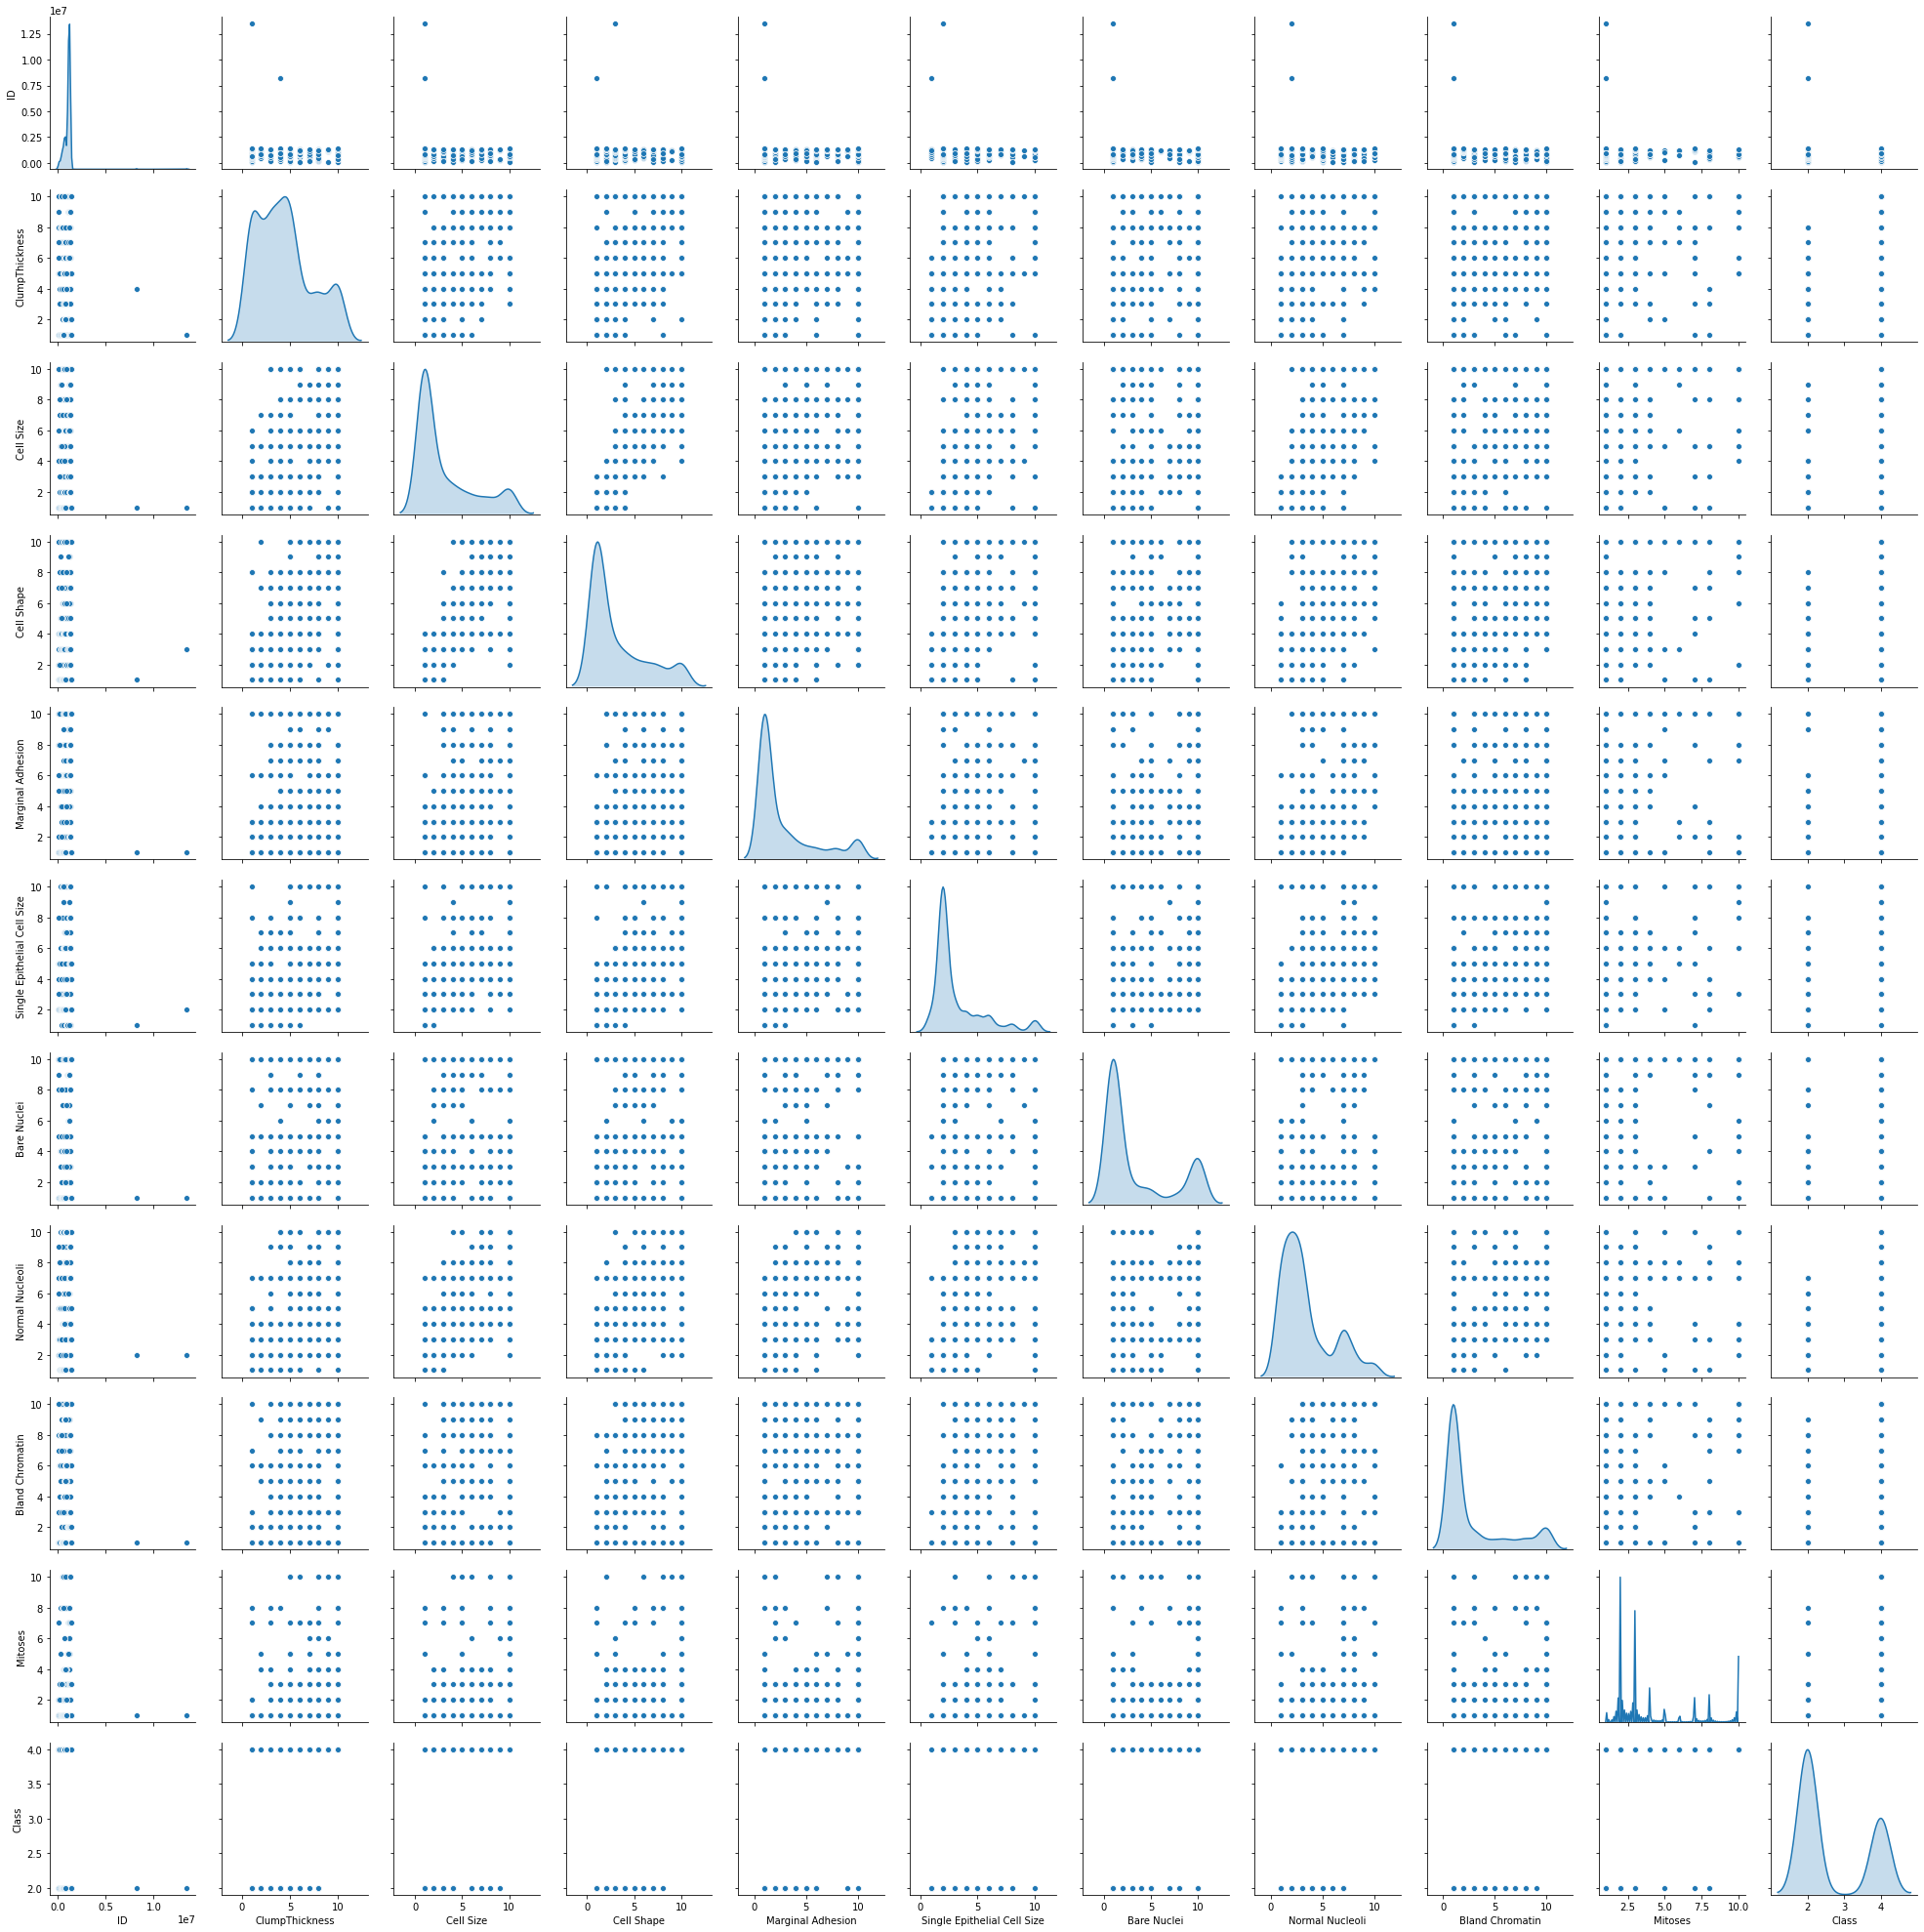

In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
#Let us check for pair plots
sns.pairplot(data_df,diag_kind='kde')

In [18]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

<AxesSubplot:>

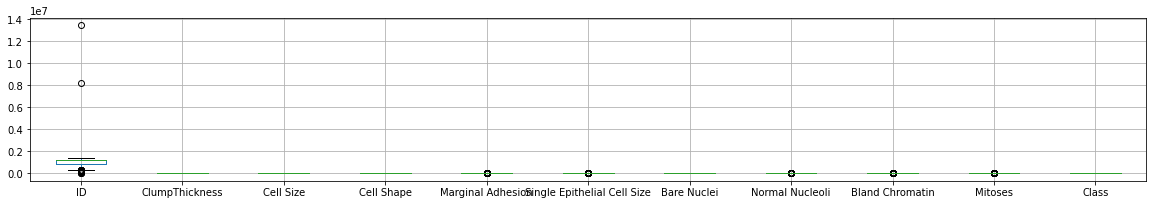

In [19]:
data_df.boxplot(figsize=(20,3))

In [20]:
# We could see few outliers here. Possible mode of imputation:
# Remove the outliers by taking anything above 3 sd from mean
# Take logarithmic transformation, it would reduce the variation
# Group few levels
pd.crosstab(data_df['Marginal Adhesion'], data_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [21]:
# We could see from 4 point onward we have similar pattern, and also few points. We can club the levels together
data_df['Marginal Adhesion'] = np.where(data_df['Marginal Adhesion'] >4, 4, data_df['Marginal Adhesion'])
data_df['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [22]:
pd.crosstab(data_df['Single Epithelial Cell Size'], data_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [23]:
# Here we could see group 4 and above could be clubbed
# We could see similar patterns fro group 1 and 2, but we are not clubbing as they have sufficient number of data points
# For PCA demonstration we can leave them as it is, but if we go for modelling we should club and check for accuracy
data_df['Single Epithelial Cell Size'] = np.where(data_df['Single Epithelial Cell Size'] >3, 3, data_df['Single Epithelial Cell Size'])

In [24]:
pd.crosstab(data_df['Normal Nucleoli'], data_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [25]:
# Clubbing levels 4 and above together
data_df['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] >4, 4, data_df['Normal Nucleoli'])

In [26]:
pd.crosstab(data_df['Bland Chromatin'], data_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [27]:
data_df['Bland Chromatin'] = np.where(data_df['Bland Chromatin'] >4, 4, data_df['Bland Chromatin'])

In [28]:
pd.crosstab(data_df['Mitoses'], data_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [29]:
data_df['Mitoses'] = np.where(data_df['Mitoses'] >3, 3, data_df['Mitoses'])

# We can group levels on top bracket as well.
# Also this analysis should be performed for other variables as well
# This creates greater effect on classification/regression algorithms. We are skipping here but should be explored further based
# on business requirement

In [30]:
# Drop id and class variables
data_new = data_df.drop(['ID','Class'], axis =1)

data_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,3,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1


In [31]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.536685,-0.686858,0.322808,-0.718310,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.161998,1.803153,0.322808,0.046557,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.536685,-0.410190,0.322808,-0.718310,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,1.161998,0.143146,0.322808,1.576291,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.536685,-0.686858,0.322808,-0.718310,-0.438024


<AxesSubplot:>

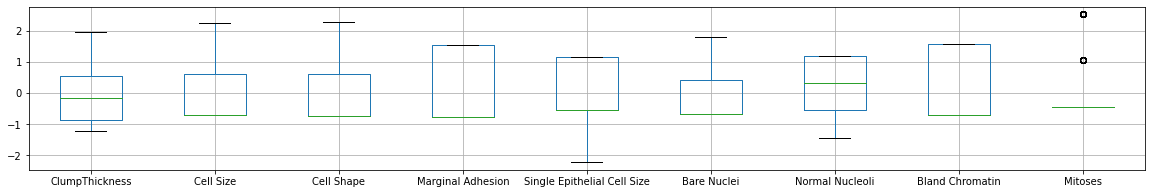

In [32]:
data_new.boxplot(figsize=(20,3))

In [33]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [34]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.56876059 0.59150555
  0.54669109 0.57214901 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.69491481 0.68556472
  0.66940328 0.72684553 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.68116899 0.70518656
  0.65890363 0.71910723 0.48167882]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.63617971 0.69693138
  0.60427482 0.65326018 0.42473633]
 [0.56876059 0.69491481 0.68116899 0.63617971 1.00145138 0.6348984
  0.57938679 0.66617045 0.42529666]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.6348984  1.00145138
  0.64237847 0.64168219 0.45258904]
 [0.54669109 0.66940328 0.65890363 0.60427482 0.57938679 0.64237847
  1.00145138 0.65441737 0.37940435]
 [0.57214901 0.72684553 0.71910723 0.65326018 0.66617045 0.64168219
  0.65441737 1.00145138 0.49312095]
 [0.42745595 0.51098944 0.48167882 0.42473633 0.42529666 0.45258904
  0.37940435 0.49312095 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [35]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.3114354   0.01568016  0.02047029  0.90541669  0.07476755 -0.20399848
   0.10539206 -0.14051697 -0.06712406]
 [ 0.37194432 -0.03811526  0.7164469   0.01327345  0.0124912   0.21915718
  -0.16821058  0.49169294  0.16878882]
 [ 0.36954798 -0.07658035 -0.68846816  0.06493104 -0.12536091  0.25767414
  -0.16140193  0.50385521  0.13165607]
 [ 0.33901535 -0.15284936 -0.05474049 -0.2499106   0.50978592 -0.44868011
  -0.25095696  0.09542832 -0.5128083 ]
 [ 0.33213311 -0.10331615 -0.02823789 -0.07803192  0.19514245  0.30069671
  -0.47696574 -0.63409222  0.33772571]
 [ 0.3414089  -0.10333249  0.07794801 -0.10158408 -0.58656918  0.2695813
   0.09087582 -0.24162259 -0.61072888]
 [ 0.32338417 -0.24134232 -0.03010916 -0.18734513  0.33818548  0.18091422
   0.78876393 -0.08730706  0.15588898]
 [ 0.34571185  0.00531696  0.00642328 -0.21995643 -0.45632921 -0.66445249
   0.06545056 -0.07679928  0.41487057]
 [ 0.24940299  0.94310533 -0.03845512 -0.11612816  0.11792794  0.07297459
   0.

# Q8 Find variance and cumulative variance by each eigen vector

In [36]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.01269211  73.6623436   79.01893031  83.78090726  88.23370958
  92.45369715  95.84290092  98.98385202 100.        ]


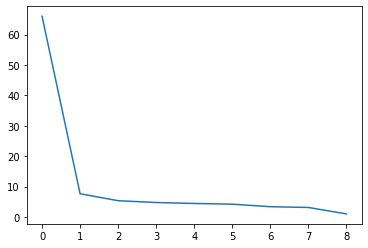

In [37]:
plt.plot(var_exp)

In [38]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 7 components here. But depending on requirement 90% variation or 5 components will also do good

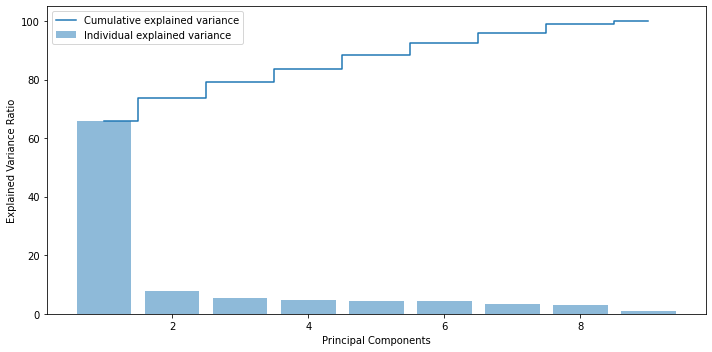

In [39]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [40]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.4041299 ,  1.80009293, -1.53091511, ...,  3.54596616,
         2.67544579,  3.01970712],
       [-0.16192711, -1.05929394, -0.20165499, ...,  0.22790085,
        -1.19958527, -1.2799403 ],
       [-0.5813698 ,  0.47119879,  0.08993856, ...,  0.59831147,
         1.06422556,  1.04843898],
       ...,
       [ 0.18622185, -1.32900516,  0.06493736, ...,  1.53630976,
         0.79160414,  0.71163103],
       [ 0.27307077,  0.79388265,  0.24009745, ..., -1.33986905,
        -0.45028227, -0.72402557],
       [ 0.12081955,  0.23487236,  0.3403235 , ...,  0.26509061,
        -0.53481417, -0.28604892]])

In [41]:
pca.components_

array([[ 0.3114354 ,  0.37194432,  0.36954798,  0.33901535,  0.33213311,
         0.3414089 ,  0.32338417,  0.34571185,  0.24940299],
       [ 0.01568016, -0.03811526, -0.07658035, -0.15284936, -0.10331615,
        -0.10333249, -0.24134232,  0.00531696,  0.94310533],
       [-0.90541669, -0.01327345, -0.06493104,  0.2499106 ,  0.07803192,
         0.10158408,  0.18734513,  0.21995643,  0.11612816],
       [ 0.10539206, -0.16821058, -0.16140193, -0.25095696, -0.47696574,
         0.09087582,  0.78876393,  0.06545056,  0.09685397],
       [-0.06712406,  0.16878882,  0.13165607, -0.5128083 ,  0.33772571,
        -0.61072888,  0.15588898,  0.41487057, -0.05684738],
       [ 0.14051697, -0.49169294, -0.50385521, -0.09542832,  0.63409222,
         0.24162259,  0.08730706,  0.07679928,  0.03925976],
       [-0.20399848,  0.21915718,  0.25767414, -0.44868011,  0.30069671,
         0.2695813 ,  0.18091422, -0.66445249,  0.07297459]])

# Q10 Find correlation between components and features

In [42]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.311435,0.371944,0.369548,0.339015,0.332133,0.341409,0.323384,0.345712,0.249403
1,0.015680,-0.038115,-0.076580,-0.152849,-0.103316,-0.103332,-0.241342,0.005317,0.943105
2,-0.905417,-0.013273,-0.064931,0.249911,0.078032,0.101584,0.187345,0.219956,0.116128
3,0.105392,-0.168211,-0.161402,-0.250957,-0.476966,0.090876,0.788764,0.065451,0.096854
4,-0.067124,0.168789,0.131656,-0.512808,0.337726,-0.610729,0.155889,0.414871,-0.056847


<AxesSubplot:>

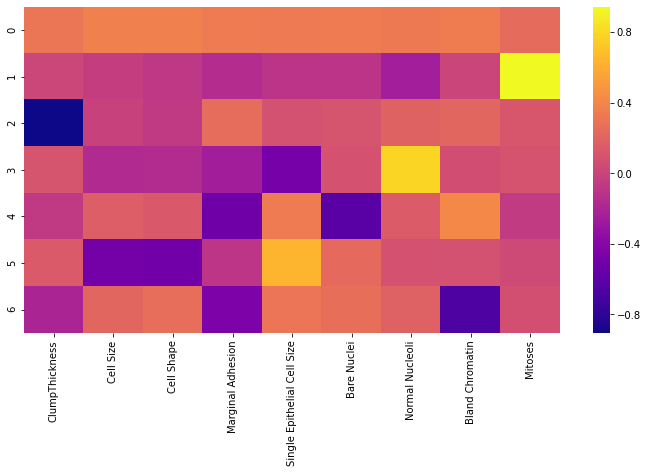

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [44]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself
# Component 5 looks more related to size and shape - We can label it as physical property
# PC1 could be labeeled with Mitoses
# Depending on relations ship, we could go ahead and label relationship with features